In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
water_file = "Resources/willamette_water_gage.csv"
fish_file = "Resources/willamette_daily_salmon.csv"

In [3]:
willamette_water_gage = pd.read_csv(water_file, sep="\t")
willamette_salmon_df = pd.read_csv(fish_file, sep=",")

In [4]:
willamette_water_gage.head()

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,10/01/2007 01:00,PDT,3.21,A,NaN,NaN
1,USGS,14211720,10/01/2007 01:30,PDT,3.12,A,NaN,NaN
2,USGS,14211720,10/01/2007 02:00,PDT,2.89,A,NaN,NaN
3,USGS,14211720,10/01/2007 02:30,PDT,2.65,A,NaN,NaN
4,USGS,14211720,10/01/2007 03:00,PDT,2.38,A,NaN,NaN


In [5]:
willamette_salmon_df.head()

,Project,Date,Chinook Run,Chin,JChin,Stlhd,WStlhd,Sock,Coho,JCoho,Shad,Lmpry,BTrout,Chum,Pink,TempC
0,Willamette Falls,3/1/2009,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Willamette Falls,3/2/2009,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,Willamette Falls,3/3/2009,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,Willamette Falls,3/4/2009,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6
4,Willamette Falls,3/5/2009,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1


In [6]:
willamette_water_gage.dtypes

agency_cd          object
site_no             int64
datetime           object
tz_cd              object
gage_height_ft    float64
gage_status        object
temp              float64
temp_status        object
dtype: object

In [7]:
willamette_salmon_df['Date'] = pd.to_datetime(willamette_salmon_df['Date'])
willamette_salmon_df.head()

,Project,Date,Chinook Run,Chin,JChin,Stlhd,WStlhd,Sock,Coho,JCoho,Shad,Lmpry,BTrout,Chum,Pink,TempC
0,Willamette Falls,2009-03-01,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Willamette Falls,2009-03-02,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,Willamette Falls,2009-03-03,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,Willamette Falls,2009-03-04,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6
4,Willamette Falls,2009-03-05,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1


In [8]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['Chinook Run', 'JChin', 'Stlhd', 'WStlhd', 'Sock', 'Coho', 'JCoho', 'Shad', 'Lmpry', 'BTrout', 'Chum', 'Pink', 'TempC'])
willamette_salmon_df["Chin"] = willamette_salmon_df["Chin"].fillna(0)

In [9]:
willamette_salmon_df.head()

,Project,Date,Chin
0,Willamette Falls,2009-03-01,0.0
1,Willamette Falls,2009-03-02,0.0
2,Willamette Falls,2009-03-03,0.0
3,Willamette Falls,2009-03-04,0.0
4,Willamette Falls,2009-03-05,0.0


In [10]:
willamette_salmon_df['Date'] = willamette_salmon_df['Date'].astype(str)
willamette_salmon_df[['year','month','day']] = willamette_salmon_df['Date'].str.split('-', expand=True)


In [11]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['Date'])
willamette_salmon_df.head()

,Project,Chin,year,month,day
0,Willamette Falls,0.0,2009,03,01
1,Willamette Falls,0.0,2009,03,02
2,Willamette Falls,0.0,2009,03,03
3,Willamette Falls,0.0,2009,03,04
4,Willamette Falls,0.0,2009,03,05


In [12]:
willamette_salmon_df["date"] = willamette_salmon_df["month"]+"/"+willamette_salmon_df["day"]+"/"+willamette_salmon_df["year"]
willamette_salmon_df.head()

,Project,Chin,year,month,day,date
0,Willamette Falls,0.0,2009,03,01,03/01/2009
1,Willamette Falls,0.0,2009,03,02,03/02/2009
2,Willamette Falls,0.0,2009,03,03,03/03/2009
3,Willamette Falls,0.0,2009,03,04,03/04/2009
4,Willamette Falls,0.0,2009,03,05,03/05/2009


In [13]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['month', 'day', 'year'])
willamette_salmon_df.head()

,Project,Chin,date
0,Willamette Falls,0.0,03/01/2009
1,Willamette Falls,0.0,03/02/2009
2,Willamette Falls,0.0,03/03/2009
3,Willamette Falls,0.0,03/04/2009
4,Willamette Falls,0.0,03/05/2009


In [14]:
willamette_water_gage[['date', 'time']] = willamette_water_gage['datetime'].str.split(' ', expand=True)
willamette_water_gage = willamette_water_gage.drop(columns=['time', 'temp_status', 'gage_status', 'datetime', 'tz_cd', 'agency_cd'])
willamette_water_gage.head()

,site_no,gage_height_ft,temp,date
0,14211720,3.21,NaN,10/01/2007
1,14211720,3.12,NaN,10/01/2007
2,14211720,2.89,NaN,10/01/2007
3,14211720,2.65,NaN,10/01/2007
4,14211720,2.38,NaN,10/01/2007


In [15]:
willamette_water_gage = willamette_water_gage.groupby('date').mean()
willamette_water_gage.head()

,site_no,gage_height_ft,temp
date,,,
01/01/2008,14211720,4.518750,NaN
01/01/2009,14211720,7.058542,NaN
01/01/2010,14211720,6.004375,4.583333
01/01/2011,14211720,7.869583,5.570833
01/01/2012,14211720,7.299479,7.233333


In [16]:
daily_salmon_willamette = pd.merge(willamette_salmon_df, willamette_water_gage, on="date")
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,6.470833
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,6.500000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,6.864583
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,7.439583
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,7.960417


In [17]:
# Create a Farenhieght Temperature
daily_salmon_willamette['temp_f'] = daily_salmon_willamette['temp'] * 1.8 + 32

# Get rid of any rows that don't have a temp
daily_salmon_willamette[daily_salmon_willamette.isna().any(axis=1)]
daily_salmon_willamette = daily_salmon_willamette.drop(columns=['temp'])
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [18]:
daily_salmon_willamette[['month','day','year']] = daily_salmon_willamette['date'].str.split('/', expand=True)
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f,month,day,year
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750,03,01,2009
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000,03,02,2009
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625,03,03,2009
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125,03,04,2009
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875,03,05,2009


In [19]:
daily_salmon_willamette['month'] = daily_salmon_willamette['month'].astype(int)
daily_salmon_willamette['day'] = daily_salmon_willamette['day'].astype(int)
daily_salmon_willamette['year'] = daily_salmon_willamette['year'].astype(int)

In [20]:
daily_salmon_willamette= daily_salmon_willamette[(daily_salmon_willamette['month'] >= 3) & (daily_salmon_willamette['month'] <= 5)]
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f,month,day,year
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750,3,1,2009
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000,3,2,2009
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625,3,3,2009
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125,3,4,2009
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875,3,5,2009


In [21]:
daily_salmon_willamette = daily_salmon_willamette.drop(columns=['month', 'day', 'year'])
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [22]:
daily_salmon_willamette = daily_salmon_willamette.dropna()

The r-value is: -0.02841658745715076
The r2-value is: 0.0008075024427098978
The p-value is: 0.347062476599009


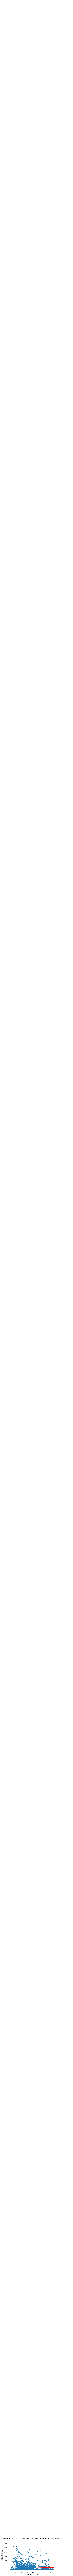

In [23]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["gage_height_ft"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["gage_height_ft"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["gage_height_ft"],daily_salmon_willamette["Chin"])

The r-value is: 0.5179478227126179
The r2-value is: 0.26826994705274143
The p-value is: 2.5054640725758246e-76


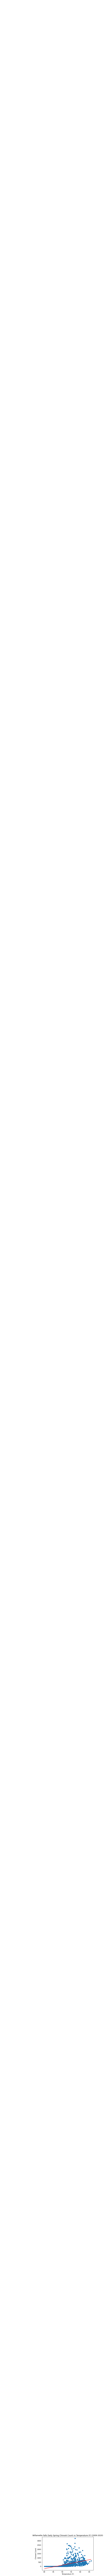

In [24]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["temp_f"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Temperature (F) (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["temp_f"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["temp_f"],daily_salmon_willamette["Chin"])

In [25]:
# Calculate a trend line
z = np.polyfit(daily_salmon_willamette["date"], daily_salmon_willamette["Chin"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Spring Chinook Counts over Time")
ax.grid(True)
ax.plot(daily_salmon_willamette["date"],p(daily_salmon_willamette["date"]),"r--")
ax.plot(daily_salmon_willamette["date"], daily_salmon_willamette["Chin"] )

TypeError: must be str, not float